<a href="https://colab.research.google.com/github/gps-prasad/FileZipper/blob/main/LangGraphBasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
!pip install langgraph

In [60]:
from typing import TypedDict, Optional
from langgraph.graph import StateGraph, START, END

In [61]:
class AgentState(TypedDict):
  num1: int
  num2: int
  operation1: str
  operation2: str
  result1: int
  result2: int

In [69]:
def conditionalNode1(state: AgentState):
  return "add" if (state["operation1"]) == 'add' else "sub"

def conditionalNode2(state: AgentState):
  return "add" if (state["operation2"]) == 'add' else "sub"

In [70]:
def addNode1(state: AgentState) -> AgentState:
  state["result"] = state["num1"] + state["num2"]
  return state

def addNode2(state: AgentState) -> AgentState:
  state["result"] = state["num1"] + state["num2"]
  return state

In [71]:
def subNode1(state: AgentState) -> AgentState:
  state["result"] = state["num1"] - state["num2"]
  return state

def subNode2(state: AgentState) -> AgentState:
  state["result"] = state["num1"] - state["num2"]
  return state

In [75]:
graph = StateGraph(AgentState)

graph.add_node("condition1",lambda state:state)

graph.add_node("condition2",lambda state:state)

graph.add_node("add",addNode1)

graph.add_node("add2",addNode2)

graph.add_node("sub",subNode1)

graph.add_node("sub2",subNode2)

graph.add_conditional_edges("condition1",conditionalNode1, {"add":"add","sub":"sub"})

graph.add_conditional_edges("condition2",conditionalNode2, {"add":"add","sub":"sub"})

graph.add_edge(START,"condition")

graph.add_edge("add",END)

graph.add_edge("sub",END)

# graph.set_entry_point("greeting")

# graph.set_finish_point("age")

app = graph.compile()

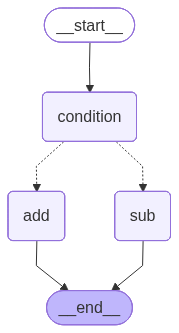

In [76]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [79]:
result = app.invoke({"num1":10,"num2":5,"operation":"sub"})

In [80]:
result["result"]

5